# Intro

It's the last time we meet in class for exercises! And to celebrate this mile-stone, we've put together an amazing set of exercises.

* We'll start with looking at communities and their words in two exercise
  - Part A1: First we finish up the work on TF-IDF from last week.
  - Part A2: Second, we play around with sentiment analysis - trying to see if we can find differences between the communities.
* In the latter half of the exercises, Part B, we'll try something completely new. As it turns out, **The two Comic Book Universes have been infected with COVID-19**. There's a lot of cool stuff you can do to understand disease spreading on networks, but we're also mindful of your time. Therefore, many of the exercises in part B are optional

![im](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/wonder_woman_mask.png "mask")


## The informal intro

First the pep-talk. A bit about the exercises today and some general silliness.

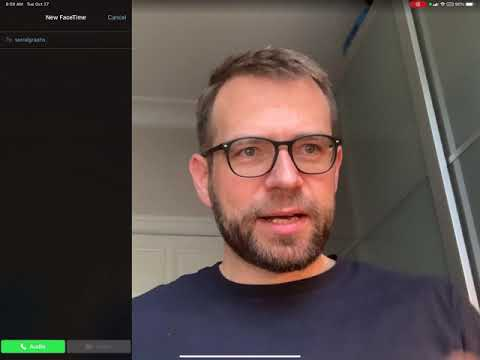

In [1]:
from IPython.display import YouTubeVideo, HTML, display
YouTubeVideo("mbQHqFnqAqw",width=800, height=450)

Next (and I've separated this part out for your convenience) I talk a bit about the final projects. Among other things, I 

* Explain what the whole thing is about
* Why the project has two parts, and how that's brilliant.
* What you'll need to do to succeed in the written part of the project.
* The time-table for the last weeks of the class.

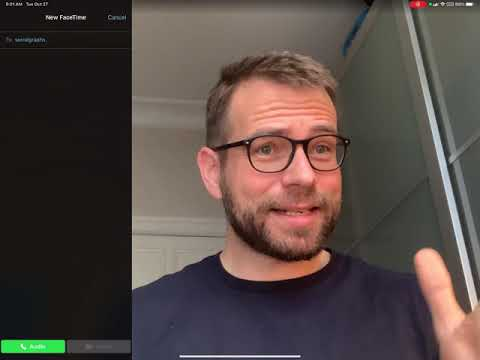

In [2]:
YouTubeVideo("JMVCVY8LB54",width=800, height=450)

# Part A1: Communities TF-IDF word-clouds


We continue where we left off last time, so the aim of this part is to create community wordclouds based on TF-IDF. Once again, it's still OK to only work with a single universe (e.g. Marvel or DC).

The aim is to understand which words are important for each community. And now that you're TF-IDF experts, we're going to use that strategy. 

Let's start by creating $N_C$ documents, where $N_C$ is the number of communities you have found in exercise 3. **We will work with the 10 largest communities.**

_Exercise 1_:

> * Now that we have the communities, let's start by calculating a the TF list for each community (use whichever version of TF you like). Find the top 5 terms within each universe. 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each community. 
>   * List the 10 top words for each universe accourding to TF-IDF. Are these 10 words more descriptive of the universe than just the TF? Justify your answer.
> * Create a wordcloud for each community. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

# Part A2 - Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



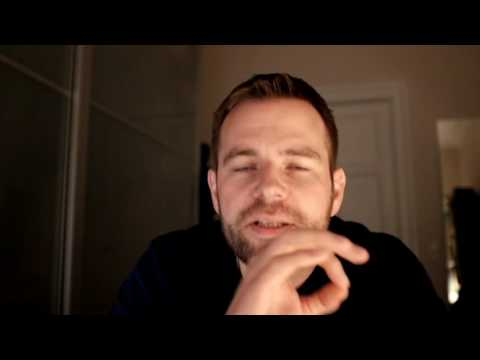

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

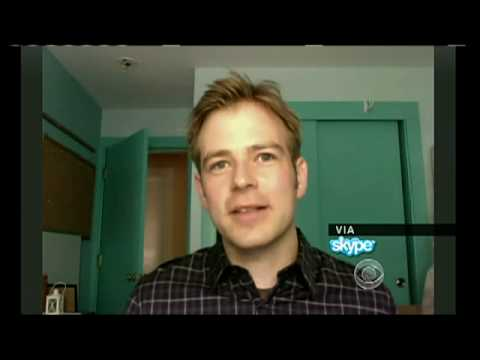

In [4]:
# There's also this one from 2010
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


_Exercise_ 2: Sentiment within the communities data. It's still OK to work with data from a single universe, and - unlike above - we work all communities.
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property. 
> * Remember histograms? Create a histogram of all character's associated page-sentiments.
> * What are the 10 characters with happiest and saddest pages?
> * Now we average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by skimming the wikipedia pages?

# Part B1

### Epidemics intro

In this exercise we will now look at a network based approach to epidemic phenomena (which in the light of the world today seem pretty relevant). This will not only give some great visualizations, where we can see how the spread envolves over time, but also allow us to understand and predict the impact of for example communities, superspreaders and vaccines.  

We will use the SIR-model (as this is what we very much hope describes Covid-19) - have a look at chapter 10 in the [Network Science book](http://networksciencebook.com/) and/or at the [wikipage](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) if you want to read about the SIR-model (as well as other types of compartmental models in epidemiology): 


> *Reading*. For Chapter 10: Epidemics of the Network Science book, the part we will read is about epidemiology without networks. So you get a bit of background.
> 
> * Read 10.1
> * Read 10.2. (Ok to just skim the derivations of SI & SIS model solution)

Instead of the book 10.3 (Network Epidemics) and 10.4 (Contact Networks), 10.5 (Beyond the Degree Distribution), 10.6 (Immunization), 10.7 (Epidemic Prediction), we will do some exercises (see below), which will give you a sense of thinking about epidemics on networks. 

But - as you can tell from the titles, you should check out those latter parts of the chapter if you’re interested in this stuff. So much is relevant in this COVID-19 times. It gives you a sense of why I’m part of the Danish COVID-19 modeling task force. If we had more time, I would have loved to dive into this. 


*Exercise*: Check your reading
> * What is homogeneous mixing. Is that a good assumption? 
> * What is the endemic state in the SI model?
> * What is the definition basic reproductive number R0?
> * Why is the SIR model the right model for modeling COVID-19? Can you think of other diseases that it would work for.



### Step 0: Building a temporal model
- This is a temporal model, so you need to keep track of time. We start at time $t=0$.
- You must be able to keep track of the state of all nodes (e.g. using a dictionary or a node-property). Nodes should be able to take on the states $S$ (susceptible), $I$ (Infected), $R$ (Recovered).
- Once a node enters the $I$ state, they stay there for 10 time-steps, then enter the $R$ state. 
- Once a nodes enters the $R$ state, no further can happen to them.
- Initialize by assigning the state $S$ to all nodes at $t = 0$.
- Now we’re ready to simulate the epidemic
    - At $t = 0$. Pick a random node, infect that node.
    - For $t > 0$. 
      - For all infected nodes.
        - Get neighbors in $S$ state (ignore nodes in state $I$ or $R$).
        - Infect these susceptible nodes to infect with probability $p = 0.1$. (Use the random module)
        - Change their state to $I$. 
      - Update the state of any $I$ nodes that have been infectious for $10$ time-steps to $R$.
      - Save the graph and increment time $t$ by 1 
      
(**Hint**: You can save the graph (including all attributes) for each timestep in a list, but you have to use do deepcopy of the graph before appending it to the list (see [Python’s copy.deepcopy](https://docs.python.org/3/library/copy.html))*)
   

### Step 1: Visualizing infection on the network
First lets make a nice visualization of our network, where we can see how the epidemic spreads over time.

![GIF](https://github.com/SocialComplexityLab/socialgraphs2020/raw/master/files/Covid_Gif_0%2C25.gif)

*Exercise*
> * Run a single infection on your superhero network (Use only the giant conponent and convert to undirected) and create a movie showing how nodes turn from gray (S) to red (I) to  light gray (R) . 
>    - The movie can be created as a gif https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python
> * In the SIR equations (see the book chapter 10, figure XXX), everyone eventually gets infected. Explain in your own words why that happens.
> * In our visualization here, you can see that there are some highly visible degree 1 nodes on the periphery that *never get infected*. Explain in your own words what's going on with those guys. 
> * More generally, can we expect everyone to get infected when we simulate spreading on a real network?
>
> 
> *Hints:*
> - *Only calculate the positions for the nodes once*
> - *This might take a while on your network, so you it might be helpfull to try on a small random network first*

### Step 2: Introduce visualizations to summarize properties of the spread across many runs
We will now look at some other visualizations that might be more usefull when evaluating the spread of the epidemic, as well as the initiatives that can be taken (social distancing, vaccines etc.). We consider two different vizualizations here (we return to these in each of the subsequent exercises):

* Left: Susceptible, Infected and Recovered 
* Right: Infected + Recovered 

![Trend plots](https://github.com/SocialComplexityLab/socialgraphs2020/raw/master/files/Covid_Trend.png)

*Exercise*: Plotting epidemic properties

> - Do a single run with a random seed up to $t=100$
>    - Save the nodes that in each timestep are $S$, $I$ and $R$ respectively eg. in a `dict`.
> - Plot fraction of susceptible, infected, recovered nodes over time (left panel) and fraction of Infected + Recovered (right panel). Comment on your results.
> - Now repeat, so that you do many (say on the order of $\mathcal{N} =  25$) runs (each with an new random seed). Store the results of each run.
> - Plot the average fractions (both *Susceptible, Infected and Recovered* and *Infected + Recovered*) across your $\mathcal{N}$ runs. Average per time-steps. 

We call these *ensemble plots* (because we average over an ensemble of runs).  For an example of ensemble plots, see figure above. In the figure, we show the individual runs as light colors and the averages as solid lines.           

## Appendix: Optional exercises

When we created these execises we were full of ideas. So we came up with all kinds of cool things that one could play with. But there's already a lot to do today. And we're all out of classes. So we decided to make the execises available in case you wanted to try them out.

BUT. To make sure none of you are completely overwhelmed, we have made the rest of the exercises optional. 

In these exercises we investigate the effect on the different initiatives. Most of the exercises do not overlap, so if you don't plan on doing them all you can choose the ones that interest you the most.

### Optional 1: Vaccinations
One of the major topics in the discussion regarding Covid-19 is a potential vaccine. Let's look at how a (perfect) vaccine will affect the spread we saw in step 2.

*Exercise*
> - Vaccinate 10, 40, 70% of nodes
>    - *hint: Vaccination can in our model be obtained by putting nodes in the recovered state from the beginning*
> - Create ensemble plots of *Infected + recovered* for each of the vacination rates.
> - Explain your results in your own words.
> - Can you say anything about [herd immunity](https://en.wikipedia.org/wiki/Herd_immunity) from looking at these plots?

### Optional 2: Social distancing
Social distancing might be largest buzz word (even above vaccines) these days, but let's be honest, while we might socially distance our self from strangers, we still see our friends. Let's have a look at how this affect the spread of the epedemic. We can visualize this using the communities you found earlier; we imagine each community represents a different friend group.

*Exercise*

> - Use the network you created in step 1 (i.e. no vaccination)
> - Disconnect the communities
>    - identify which edges are **within** a community and which are **between** communities
>    - loop over all edges
>        - If edge is within a community: Keep it
>        - If edge is between a communities: Remove it with some probability (you can play around with different probabilities and see how this affect the spread).
> - Create ensemble plots for each scenario and compare the results by comparing *Infected + recovered* plots for the various amounts of social distancing.


### Optional 3: The effect of who is infected early
One might suspect that it has a large significance on the spread who (in the network) is infected first. Let's investigate this by controling who is infected in the first timestep.

*Exercise*
> - Plot averages of many runs (ensemble plots), seeding random individuals based on centrality (Choose your random seed among top 5% central characters).
> - Repeat, but this time chhose your random seed among the bottom 5% central characters.
> - Create ensemble plots for each scenario and compare the results by comparing *Infected + recovered* plots for top/bottom centrality individuals. To make it extra fancy, put in a plot of random seeding (just grab the results from above).

### Optional 4: Superspreaders 
To illustrate the concept of superspreaders we turn away from our super hero network and consider a watts-strogatz model instead. We will track the spread of the epedemic and then at some timestep introduce a superspreader (a node that is infected and has many connections) to see how the effect on the spread is.

*Exercise*
> - Create a watts-strogatz network with $n = 10000$, $k = 5$, $p = 0.1$.
> - Simulate the spread (as done in the previous exercises) setting a random node to Infected
>     - at time $t = 50$ introduce a new node that is infected and has many connections 
> - Repeat many times and create ensemble *Infected + Recovered* plots of the development of the spread as above.
> - Comment on the result
> - *Extra*: Play around with the timing of introducing the superspreader; does this have an effect on what happens?

### Optional 5: A non-perfect vaccine
One of the concerns regarding a vaccine, is that it is faulty. We will try to simulate what this could mean in the case of a random network under the following assumptions:
- People social distance a lot prior to the vaccine (i.e. the probability of nodes being connected is  low)
- Once the vaccine is introduced and everyone is vaccinated people stop socially distancing (e.i. the probability of nodes being connceted increases),
- The probability that a vaccinated person is immune is 30%.

*Exercise*

> - Create a random network 
>     - Use an Barabási–Albert network with $n = 10000$ and $m = 2$ (you're welcome to try different networks and settings too)
> - Start simulating the epidemic
>     - At time $t = 50$
>         - Vaccinate everyone, but only move nodes to Recovered with probability $0.3$.
>         - Add $1000$ edges at random
>     - Continue the simulation until $t = 100$.
> - Repeat many times and plot ensemble graphs for Infected + Recovered to understand what's going on. 
> - Comment on your results.

**Takehome message**: The point of these last two exercises is **not** to make accurate predictions, but to show you all that we can use simple mathematical models to sharpen our intuitions about things that might happen in the real world.

*Big thanks* to TA Benjamin for helping design the exercises for today.